In [26]:
import pandas as pd
StockPrices = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
StockPrices = StockPrices.sort_values(by='Date')
StockPrices.set_index('Date', inplace=True)

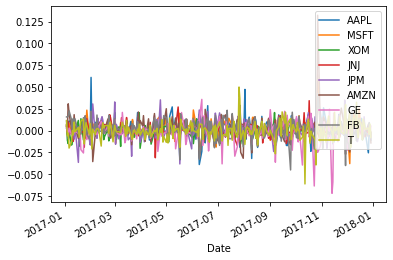

In [27]:
StockPrices.head()
StockPrices.plot()

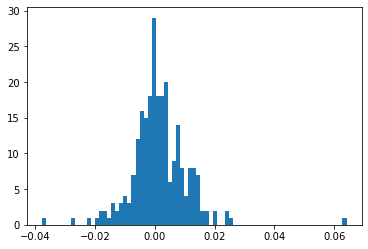

In [28]:
import matplotlib.pyplot as plt
plt.hist(StockPrices["MSFT"].dropna(), bins=75, density=False)
plt.show()

# Calculating Mean Returns

In [29]:
import numpy as np
np.mean(StockPrices["MSFT"])

0.001405223508794588

In [30]:
### average annualized return assuming 252 trading days in a year
((1+np.mean(StockPrices["MSFT"]))**252)-1

0.42456677615481975

In [31]:
np.std(StockPrices["MSFT"])

0.009306242470890874

In [32]:
np.std(StockPrices["MSFT"])**2

8.660614892701309e-05

In [33]:
# Scaling Volatility
np.std(StockPrices["MSFT"]) * np.sqrt(252)

0.14773201931066704

In [34]:
from scipy.stats import skew
skew(StockPrices["MSFT"].dropna())

0.8600576563864372

In [35]:
from scipy.stats import kurtosis
In [2]: kurtosis(StockPrices["MSFT"].dropna())

8.672851104304732

In [36]:
from scipy import stats
p_value = stats.shapiro(StockPrices["MSFT"].dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


# Portfolio Composition

In [37]:
import numpy as np
portfolio_weights = np.array([0.05, 0.15,0.05, 0.15, 0.10,0.10,0.10, 0.20, 0.10])
port_ret = StockPrices.mul(portfolio_weights, axis=1).sum(axis=1)
StockPrices["Portfolio"] = port_ret
port_ret



Date
2017-01-03    0.008553
2017-01-04    0.001709
2017-01-05    0.005719
2017-01-06    0.005948
2017-01-09   -0.000002
                ...   
2017-12-22   -0.001763
2017-12-26   -0.001939
2017-12-27    0.002804
2017-12-28    0.002044
2017-12-29   -0.006057
Length: 251, dtype: float64

In [38]:
import numpy as np
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockPrices['Portfolio_EW']= StockPrices.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

                                                                       

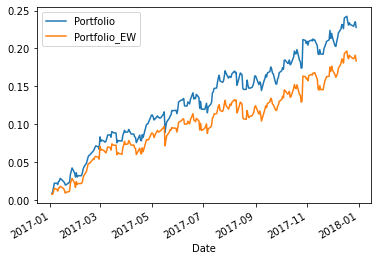

In [24]:
import matplotlib.pyplot as plt
CumulativeReturns = ((1+StockPrices).cumprod()-1)
CumulativeReturns[["Portfolio","Portfolio_EW"]].plot()

### Market-Cap Weights

In [40]:
market_capitalizations = np.array([100, 200, 100,  200, 100,  200, 100,  200,100])
mcap_weights = market_capitalizations/sum(market_capitalizations)
mcap_weights


array([0.07692308, 0.15384615, 0.07692308, 0.15384615, 0.07692308,
       0.15384615, 0.07692308, 0.15384615, 0.07692308])

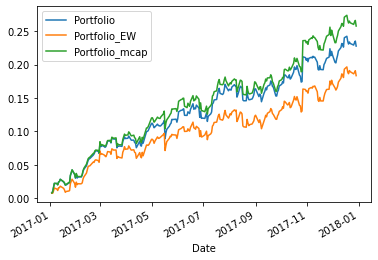

In [44]:
StockPrices['Portfolio_mcap']= StockPrices.iloc[:,0:numstocks].mul(mcap_weights , axis=1).sum(axis=1)

CumulativeReturns = ((1+StockPrices).cumprod()-1)
CumulativeReturns[["Portfolio","Portfolio_EW", 'Portfolio_mcap']].plot()

### Correlation Matrix

In [52]:
StockPrices = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
StockPrices = StockPrices.sort_values(by='Date')
StockPrices.set_index('Date', inplace=True)
correlation_matrix = StockPrices.corr()
cov_mat_annual = correlation_matrix*252
print(cov_mat_annual)

            AAPL        MSFT         XOM         JNJ         JPM        AMZN  \
AAPL  252.000000  110.232330   13.987204    9.684857   50.378405  128.386880   
MSFT  110.232330  252.000000   21.195335   58.014181   48.194509  156.516096   
XOM    13.987204   21.195335  252.000000   30.494908   77.093472    3.809727   
JNJ     9.684857   58.014181   30.494908  252.000000   17.722667   13.300704   
JPM    50.378405   48.194509   77.093472   17.722667  252.000000    3.507591   
AMZN  128.386880  156.516096    3.809727   13.300704    3.507591  252.000000   
GE      1.704954  -11.296389   48.852980   17.118268   64.864966  -23.231454   
FB    136.676592  136.921899  -11.796886   20.006606   24.001752  164.563578   
T       1.280590   -5.311814   49.789058   23.088666   63.713640   -4.513160   

              GE          FB           T  
AAPL    1.704954  136.676592    1.280590  
MSFT  -11.296389  136.921899   -5.311814  
XOM    48.852980  -11.796886   49.789058  
JNJ    17.118268   20.00660

In [53]:

weights=np.array([0.05, 0.15,0.05, 0.15, 0.10,0.10,0.10, 0.20, 0.10])
port_vol = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix, weights)))
port_vol

0.5342737810381923

# The Capital Asset Pricing Model

In [57]:
Data=pd.read_csv('FamaFrenchFactors.csv')
Data['date'] = pd.to_datetime(Data['Date'], format='%Y-%m-%d')
Data.set_index(['Date'], inplace = True)
Data=Data.drop(columns='date')
Data.head()


,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


#### Calculating Beta Using Co-Variance

In [58]:
covariance_matrix = Data[["Portfolio","Market_Excess"]].cov()
covariance_coefficient = covariance_matrix.iloc[0,1]
benchmark_variance = Data["Market_Excess"].var()
portfolio_beta = covariance_coefficient / benchmark_variance
portfolio_beta

0.9738085477940357

#### Calculating Beta Using Linear Regression

In [60]:
import statsmodels.formula.api as smf
model = smf.ols(formula='Portfolio ~ Market_Excess', data=Data)
fit = model.fit()
beta = fit.params["Market_Excess"]
beta

0.9738085477940357

In [61]:
#### R-Squared vs Adjusted R-Squared
r_squared = fit.rsquared
print(r_squared)
print(fit.rsquared_adj)

0.794502321892429
0.7943387090913879


# Alpha and Multi-Factor Models
#### Fama-French 3 Factor Model

In [64]:
model = smf.ols(formula='Portfolio ~ Market_Excess+ SMB + HML', data=Data)
fit = model.fit()
print(fit.rsquared)
print(fit.rsquared_adj)

0.8198995753534163
0.8194687130934962


In [65]:
# P-Values and Statistical Significance
print(fit.pvalues["HML"])
fit.pvalues["HML"] < 0.05

4.6546317150002245e-07


True

In [66]:
# Extracting Coefficients
print(fit.params["HML"], fit.params["SMB"])

-0.1086720927132234 -0.2621511591247632


In [67]:
# Alpha and the Efficient Market Hypothesis
portfolio_alpha = fit.params["Intercept"]
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
portfolio_alpha_annualized


0.049410766185005395

#### Fama-French 5 Factor Model

In [68]:
model = smf.ols(formula='Portfolio ~ Market_Excess+ SMB + HML+ RMW + CMA+RF', data=Data)
fit = model.fit()
print(fit.rsquared)
print(fit.rsquared_adj)

0.83817909083202
0.8374029713635884


# Estimating Tail Risk

In [69]:
StockReturns=pd.read_csv('USO.csv')
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'], format='%Y-%m-%d')
StockReturns.set_index(['Date'], inplace = True)

StockReturns.head()

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001


In [72]:
# Historical Drawdown
running_max = np.maximum.accumulate(StockReturns)
running_max[running_max < 1] = 1
drawdown = (StockReturns)/running_max - 1
drawdown

,USO
Date,
2007-01-03,-1.042636
2007-01-04,-1.040688
2007-01-05,-0.990715
2007-01-08,-1.007109
2007-01-09,-1.004001
...,...
2017-12-22,-0.998282
2017-12-26,-0.975129
2017-12-27,-1.002510


### Historical Value at Risk

In [73]:
var_level = 95
var_95 = np.percentile(StockReturns, 100 - var_level)
var_95

-0.03608233764037496

In [75]:
# Historical Expected Shortfall
cvar_95 = StockReturns[StockReturns <= var_95].mean()
cvar_95

USO   -0.050541
dtype: float64

### Parametric VaR

In [77]:
from scipy.stats import norm
mu = np.mean(StockReturns)
std = np.std(StockReturns)
confidence_level = 0.05
VaR = norm.ppf(confidence_level, mu, std)
VaR


array([-0.03628909])

##### Scaling Risk
Assuming you have a one-day estimate of VaR(95) var_95.
To estimate 5-day VaR(95):

In [78]:
forecast_days = 5
forecast_var95_5day = var_95*np.sqrt(forecast_days)
forecast_var95_5day

-0.08068255975097778

# Random Walks
simulate a random walk

In [79]:
mu = np.mean(StockReturns)
std = np.std(StockReturns)
T = 252
S0 = 10
rand_rets = np.random.normal(mu,std,T) + 1
forecasted_values = S0*(rand_rets.cumprod())
forecasted_values

array([ 9.87638309,  9.96871793, 10.04950612, 10.10215528, 10.74282449,
       10.67211293, 10.80562157, 10.45632915, 10.51074861, 10.97880525,
       10.90999933, 10.94316375, 10.82856416, 10.91784286, 10.6978859 ,
       10.95512456, 10.91038556, 10.81720574, 10.62601123, 10.51221336,
       10.15242047, 10.15192953,  9.96396092, 10.10518967, 10.19468613,
       10.18411631, 10.281226  , 10.54200057, 10.50183324, 10.32496328,
       10.01707271,  9.74075196,  9.66283197,  9.49224257,  9.52847366,
        9.66613426,  9.60309078,  9.33513087,  9.27263951,  9.33062605,
        9.28432932,  9.38248048,  9.23841283,  9.34704376,  9.6862785 ,
        9.69560469, 10.11090908, 10.41770404, 10.43351678, 10.68893365,
       10.59535972, 10.63352218, 11.04792331, 11.49140702, 11.78325175,
       11.84284509, 11.70579025, 11.58582472, 11.19010186, 11.1049474 ,
       10.89899248, 11.01161735, 10.65557997, 10.17230384, 10.11831102,
       10.1714097 , 10.11478662, 10.17061002, 10.38503772, 10.36

# Monte Carlo Simulations
A series of Monte Carlo simulations of a single asset starting at stock price $10 at
T0. Forecasted for 1 year (252 trading days along the x-axis):

In [80]:
# To calculate the VaR(95) of 100 Monte Carlo simulations

mu = 0.0005
vol = 0.001
T = 252
sim_returns = []
for i in range(100):
    rand_rets = np.random.normal(mu,vol,T)
    sim_returns.append(rand_rets)
    var_95 = np.percentile(sim_returns, 5)
var_95


-0.0011457680539133728